In [1]:
import torch
import trackpy as tp
import pickle
import matplotlib.pyplot as plt
import numpy as np
from trackpy.utils import validate_tuple
import trackpy.preprocessing as tpp
import torchvision
import scipy.ndimage as nd
import hatzakis_lab_tracking as hlt
device = "cuda"
cpu = lambda x: np.array(np.squeeze(x.detach().cpu()))


/opt/anaconda3/envs/fungi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [158]:
from test_torch_tracking import VideoChunker
import numpy as np
import os
import torch
vid_path = r"../sample_vids/s_20.tif"
chunker = VideoChunker(vid_path,
        gb_limit = 0.2,
        dtype = np.float32,
        )
for _, vid_chunk in chunker:
    vid_chunk
    break


In [151]:
import pickle
with open("new_dilation.pckl", "rb") as f1, open("old_dilation.pckl", "rb") as f2:
    new_dil, old_dil = pickle.load(f1), pickle.load(f2)
new_dil = new_dil.cpu().numpy()

In [254]:
with open("results.pckl", "rb") as file:
    df, tp_df = pickle.load(file)
df = df.reset_index(drop = True)

In [238]:
(df[df["frame"] == 0][var] - tp_df[var]).loc[0:10]

0    -8.173641e-06
1     7.215648e-07
2     1.688763e-06
3    -8.812465e-07
4     4.705821e-06
5    -4.473409e-01
6    -4.301372e-01
7    -3.371564e-01
8    -4.588586e-01
9    -2.952718e-01
10   -2.153251e+00
Name: y, dtype: float64

In [218]:
tp_df

,y,x,mass,size,ecc,signal,raw_mass,ep
0,5.866905,357.772249,254.448392,0.929202,0.546845,77.562795,28294.0,0.385387
1,6.905982,319.867510,216.916782,0.937404,0.587239,65.354850,28306.0,0.379571
2,6.857650,475.975948,344.790025,1.006440,0.184309,84.368634,29046.0,0.196599
3,7.815583,90.932188,392.681639,1.020452,0.374951,94.691669,28687.0,0.256609
4,8.123896,182.055383,259.103102,1.023189,0.372706,60.136539,28423.0,0.330882
...,...,...,...,...,...,...,...,...
414,500.164276,258.215860,316.142795,1.038900,0.215028,73.340653,28960.0,0.208266
415,501.593603,483.866950,273.352008,0.986543,0.410960,70.629342,28240.0,0.413930
416,501.946438,502.679655,296.846730,1.056537,0.432899,66.774292,28194.0,0.441804
417,504.850789,324.809644,312.823587,1.311188,0.439359,56.977961,28655.0,0.263786


In [208]:
df[df["frame"] == 0]

,frame,y,x,mass,signal
0,0,5.866897,357.772247,254.446289,77.562744
1,0,6.905982,319.867493,216.914795,65.354492
2,0,6.857652,475.975952,344.790283,84.368408
3,0,7.815582,90.932190,392.680908,94.691162
4,0,8.123900,182.055389,259.097900,60.135742
...,...,...,...,...,...
568,0,501.946442,502.679657,296.847900,66.775146
569,0,502.688629,142.881805,208.513916,46.382568
570,0,504.850800,324.809662,312.820801,56.977539
571,0,505.427185,423.600403,283.598145,65.444336


In [204]:
df - tp_df

,ecc,ep,frame,mass,raw_mass,signal,size,x,y
0,NaN,NaN,NaN,-111.373128,NaN,11.186457,NaN,-10.083525,-0.536415
1,NaN,NaN,NaN,-100.574096,NaN,-26.040522,NaN,35.086311,-2.091632
2,NaN,NaN,NaN,-4.293095,NaN,-19.283157,NaN,264.134779,-3.286805
3,NaN,NaN,NaN,60.498451,NaN,2.078561,NaN,-298.167692,-2.363947
4,NaN,NaN,NaN,-57.463507,NaN,-3.211465,NaN,-283.675492,-3.207017
...,...,...,...,...,...,...,...,...,...
1128280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
(df[["y", "x"]] - tp_df[["y", "x"]])

,y,x
0,-2.535639,-12.083537
1,-4.094018,33.086072
2,-5.286626,262.135156
3,-4.364174,-300.165541
4,-5.206995,-285.677700
...,...,...
1128280,NaN,NaN
1128281,NaN,NaN
1128282,NaN,NaN
1128283,NaN,NaN


In [162]:
np.loadtxt("coords.txt") == 

C:\Users\andre\AppData\Local\Temp\ipykernel_2344\3493306157.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.loadtxt("coords.txt") == np.loadtxt("coords2.txt")


False

In [198]:
old = np.loadtxt("old_coords.txt")
new = np.loadtxt("new_coords.txt")  

In [214]:
new

array([[  5.86689663, 357.77224731],
       [  6.90598249, 319.86749268],
       [  6.85765219, 475.97595215],
       ...,
       [504.85079956, 324.80966187],
       [505.42718506, 423.60040283],
       [505.06079102, 471.04382324]])

In [213]:
df[df["frame"] == 0][["y", "x"]].values - old

array([[-8.17364051e-06, -1.71225901e-06],
       [ 7.21564757e-07, -1.76321143e-05],
       [ 1.68876268e-06,  4.45235412e-06],
       ...,
       [ 1.04488386e-05,  1.76017321e-05],
       [-1.40424964e-06, -1.56221006e-06],
       [-1.08960639e-05, -6.16008867e-06]])

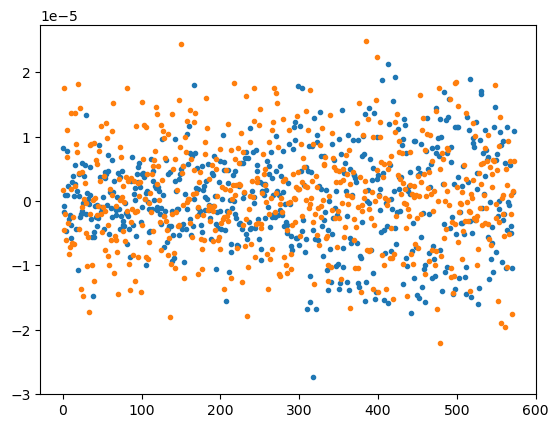

In [202]:
plt.plot(old - new, ".")

In [185]:
np.array([-0.13310343, -0.22775501]) - np.array([[-0.1330951970259895, -0.22775097328787264]])

array([[-8.23297401e-06, -4.03671213e-06]])

In [178]:
(old == new).all()

False

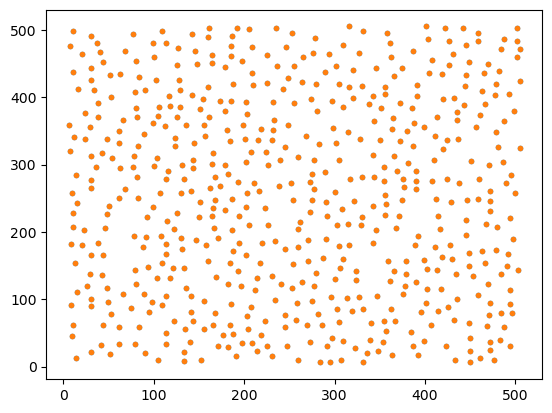

In [174]:
plt.plot(*old.T, ".")
plt.plot(*new.T, ".")

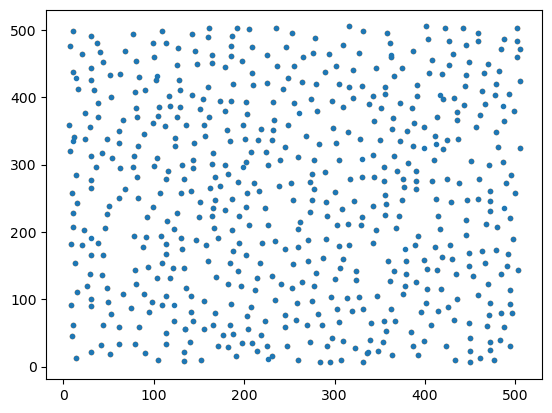

In [170]:
plt.plot(*new.T, "C1.")
plt.plot(*old.T, "C0.")

In [161]:
tp_df

,y,x,mass,size,ecc,signal,raw_mass,ep
0,6.402536,367.855784,362.622944,1.218583,0.551563,66.088175,28811.0,0.187355
1,9.000000,284.781421,315.499202,0.935049,0.459433,91.374086,28280.0,0.302030
2,10.144279,211.840796,346.531910,0.922359,0.404504,103.442361,28743.0,0.196930
3,10.179756,389.097731,329.291517,1.000000,0.500712,92.523445,28898.0,0.176382
4,11.330896,465.733090,314.349842,1.182598,0.074538,63.214776,28795.0,0.189523
...,...,...,...,...,...,...,...,...
397,500.380062,221.176012,368.944422,1.145899,0.542029,72.984333,29064.0,0.158654
398,500.958848,22.053498,139.647188,0.824022,0.644770,52.295860,27792.0,0.690372
399,502.934177,256.835443,226.998515,1.066165,0.675143,56.893299,28128.0,0.366189
400,505.473054,357.996008,287.914572,1.169301,0.408125,61.490737,28456.0,0.251091


In [157]:
df[df["frame"] == 0]

,frame,y,x,mass,signal
0,0,3.866897,355.772247,254.446289,77.562744
1,0,4.905982,317.867493,216.914795,65.354492
2,0,4.857653,473.975952,344.790283,84.368408
3,0,5.815582,88.932190,392.680908,94.691162
4,0,6.123900,180.055389,259.097900,60.135742
...,...,...,...,...,...
568,0,499.946442,500.679657,296.847900,66.775146
569,0,500.688629,140.881805,208.513916,46.382568
570,0,502.850800,322.809662,312.820801,56.977539
571,0,503.427185,421.600403,283.598145,65.444336


In [146]:
tp_df

,y,x,mass,size,ecc,signal,raw_mass,ep
0,6.403311,367.855772,365.819417,1.219779,0.549816,66.376287,28811.0,0.191827
1,8.997614,284.781182,317.488891,0.937132,0.455082,91.395014,28280.0,0.310640
2,10.144457,211.841173,349.083378,0.924602,0.400104,103.651565,28743.0,0.201707
3,10.179528,389.099882,332.182457,1.002553,0.497841,92.612601,28898.0,0.180515
4,11.330918,465.730881,316.561407,1.184667,0.074741,63.347207,28795.0,0.194064
...,...,...,...,...,...,...,...,...
396,500.380117,221.173736,372.453870,1.149011,0.542440,73.493117,29064.0,0.162258
397,500.954721,22.053524,141.728757,0.830572,0.632130,52.574935,27792.0,0.721105
398,502.931272,256.836931,229.071973,1.069708,0.673405,56.957677,28128.0,0.377585
399,505.471716,357.995160,290.497141,1.169772,0.402382,61.624564,28456.0,0.257730


,frame,y,x,mass,signal
0,0,3.866897,355.772247,254.446289,231.910889
1,0,4.905982,317.867493,216.914795,231.910889
2,0,4.857653,473.975952,344.790283,231.910889
3,0,5.815582,88.932190,392.680908,231.910889
4,0,6.123900,180.055389,259.097900,231.910889
...,...,...,...,...,...
568,0,499.946442,500.679657,296.847900,231.910889
569,0,500.688629,140.881805,208.513916,231.910889
570,0,502.850800,322.809662,312.820801,231.910889
571,0,503.427185,421.600403,283.598145,231.910889


In [143]:
df

,frame,y,x,mass,signal
0,0,3.866897,355.772247,254.446289,231.910889
1,0,4.905982,317.867493,216.914795,231.910889
2,0,4.857653,473.975952,344.790283,231.910889
3,0,5.815582,88.932190,392.680908,231.910889
4,0,6.123900,180.055389,259.097900,231.910889
...,...,...,...,...,...
1128280,665,500.171143,213.795197,283.001953,255.961182
1128281,665,499.930298,264.702972,229.137695,255.961182
1128282,665,501.183014,404.457397,351.189209,255.961182
1128283,665,501.949127,291.744690,225.958984,255.961182


In [120]:
df[df["frame"] == 0][["y", "x"]].values

array([[  3.8668966, 355.77225  ],
       [  4.9059825, 317.8675   ],
       [  4.8576527, 473.97595  ],
       ...,
       [500.1415   , 447.84207  ],
       [500.93127  , 254.83693  ],
       [503.4717   , 355.99515  ]], dtype=float32)

In [133]:
df

,frame,y,x,mass
0,0.0,3.866897,355.772247,254.446289
1,0.0,4.905982,317.867493,216.914795
2,0.0,4.857653,473.975952,344.790283
3,0.0,5.815582,88.932190,392.680908
4,0.0,6.123900,180.055389,259.097900
...,...,...,...,...
1128280,665.0,500.171143,213.795197,283.001953
1128281,665.0,499.930298,264.702972,229.137695
1128282,665.0,501.183014,404.457397,351.189209
1128283,665.0,501.949127,291.744690,225.958984


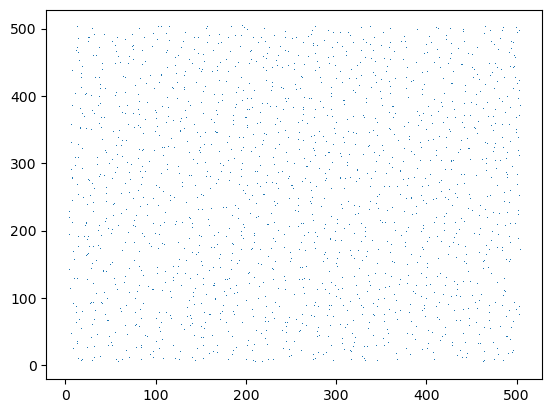

In [132]:
plt.plot(*df[df["frame"] == 6][["y", "x"]].values.T, ",")

In [98]:
df.x.isna().idxmax()

75217

In [105]:
len(df)

ZeroDivisionError: division by zero

In [25]:
with open("args.pickle", "rb") as argfile, open("res.pickle", "rb") as resfile, open("intpic.pickle", "rb") as picfile:
    args = pickle.load(argfile)
    res = pickle.load(resfile)
    pic = pickle.load(picfile)


EOFError: Ran out of input

## Start "bandpass"

In [106]:

# device = "cpu"
# image, lshort, llong, threshold, truncate = args
image = hlt.image_loader_video(r"C:\Users\andre\Documents\tracking_optimizations\emily_tracking\sample_vids\Experiment_Process_001_20220823.tif")
lshort, llong, threshold, truncate = 1, 13, 0, 4
lshort = validate_tuple(lshort, image.ndim)
llong = validate_tuple(llong, image.ndim)
timage = torch.tensor(image.astype(float)).reshape(1, 1, *image.shape).to(device)
padder = (*(np.array(llong) // 2),)*2
padded_timage = torch.nn.functional.pad(timage, padder, "replicate").to(device)

gauss_ker = [tp.masks.gaussian_kernel(sigma, truncate) for sigma in lshort]


In [107]:
padded_timage[:] = 0
timage, padded_timage

(tensor([[[[[2148., 2125., 2094.,  ..., 2113., 2104., 2158.],
            [2139., 2144., 2146.,  ..., 2101., 2089., 2129.],
            [2126., 2171., 2220.,  ..., 2090., 2081., 2107.],
            ...,
            [2155., 2160., 2159.,  ..., 2174., 2128., 2039.],
            [2139., 2161., 2185.,  ..., 2153., 2097., 2044.],
            [2108., 2168., 2243.,  ..., 2123., 2055., 2050.]],
 
           [[2098., 2136., 2207.,  ..., 2068., 2168., 2286.],
            [2118., 2145., 2201.,  ..., 2083., 2135., 2226.],
            [2148., 2162., 2199.,  ..., 2103., 2089., 2139.],
            ...,
            [2075., 2071., 2070.,  ..., 2109., 2141., 2185.],
            [2079., 2075., 2076.,  ..., 2110., 2134., 2156.],
            [2098., 2091., 2090.,  ..., 2105., 2107., 2099.]],
 
           [[2144., 2141., 2143.,  ..., 2291., 2271., 2164.],
            [2140., 2139., 2142.,  ..., 2222., 2204., 2159.],
            [2131., 2140., 2153.,  ..., 2132., 2121., 2168.],
            ...,
            [

In [19]:
# %%timeit
box = tpp.boxcar(image, llong)
filter = torch.full(llong, 1/np.product(llong), dtype = torch.double).reshape(1, 1, *llong).to(device)
meaned = torch.nn.functional.conv2d(padded_timage, filter)


ValueError: Smoothing size must be an odd integer. Round up.

In [77]:
final_coords.is_floating_point()

True

In [75]:
np.issubdtype(final_coords.dtype, torch.float)

TypeError: Cannot interpret 'torch.float64' as a data type

In [78]:
# %%timeit
low = tpp.lowpass(image, lshort, truncate)

lwx = int(truncate * lshort[0] + 0.5)
x = np.arange(-lwx, lwx + 1)
lwy = int(truncate * lshort[1] + 0.5)
y = np.arange(-lwy, lwy + 1)
x = x.reshape(-1, 1)
y = y.reshape(1, -1)
r2 = x**2 + y**2
res = np.exp(r2/(-2*lshort[0]**2))
res /= res.sum()
filter = torch.tensor(res).reshape(1, 1, *res.shape).to(device)

blurred = torch.nn.functional.conv2d(timage, filter, padding = "same")
abs(cpu(blurred) - low).sum()

NameError: name 'lshort' is not defined

In [27]:
result = blurred - meaned
result = torch.where(result >= threshold, result, 0)
(cpu(result) - tpp.bandpass(*args)).__abs__().sum()

NameError: name 'blurred' is not defined

## End bandpass
## Start grey_dilation

In [87]:
with open("grey_args.pckl", "rb") as argfile:
    args = pickle.load(argfile)
image, separation, percentile, margin, precise = args
separation = (9, )*2
# percentile = 64
ndim = image.ndim
size = [int(2 * s / np.sqrt(ndim)) for s in separation]
padding = (*(np.array(size) // 2).astype(int),)
timage = torch.tensor(image, dtype = torch.float).reshape(1, 1, *image.shape)
threshold = tp.find.percentile_threshold(image, percentile)
shape = np.array(image.shape)
threshold

22.0

In [88]:
dilation = torch.nn.functional.max_pool2d(timage, size, stride = 1, padding = padding)
old = nd.grey_dilation(image, size, mode = "constant")
# (cpu(dilation).astype(int) == old).all()

In [89]:
dilation.shape

torch.Size([1, 1, 513, 513])

In [58]:
diff = cpu(dilation[0, 0, 1:, 1:]).astype(int) - old

In [61]:
(~diff).all()

True

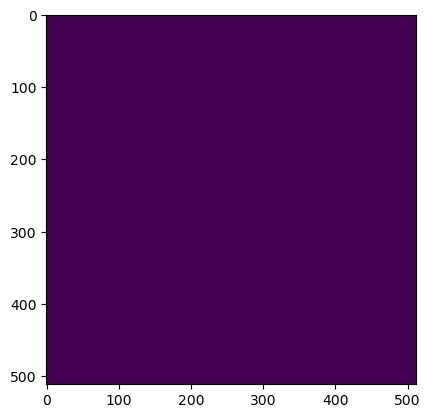

In [59]:
plt.imshow(diff)

In [5]:
maxima = (image == cpu(dilation)) & (image > threshold)
# maxima = np.nonzero(maxima)

In [6]:
old_pos = np.stack(np.nonzero(maxima)).T

In [112]:
candidates = torch.nonzero((timage == dilation) & (timage > threshold))
pos = candidates[:, 2:]

RuntimeError: The size of tensor a (768) must match the size of tensor b (512) at non-singleton dimension 4

In [8]:
at_boundary = ((pos < torch.tensor(margin)) | (pos > (torch.tensor(shape) - torch.tensor(margin) -1))).any(axis = 1)

In [9]:
candidates[~at_boundary].shape

torch.Size([2031, 4])

In [10]:
(cpu(pos) == old_pos).all()

True

## End dilation
## Start refine_com

In [60]:
with open("com_args.pckl", "rb") as file:
    args = pickle.load(file)
    (raw_image, image, radius, coords, max_iterations,
            shift_thresh, characterize, walkthrough) = args
shift_thresh = 0.5

if not np.issubdtype(coords.dtype, np.integer):
    raise ValueError('The coords array should be of integer datatype')
ndim = image.ndim
isotropic = np.all(radius[1:] == radius[:-1])
mask = tp.masks.binary_mask(radius, ndim).astype(np.uint8)

# Declare arrays that we will fill iteratively through loop.
N = coords.shape[0]
final_coords = np.empty_like(coords, dtype=np.float64)
mass = np.empty(N, dtype=np.float64)
raw_mass = np.empty(N, dtype=np.float64)
if characterize:
    if isotropic:
        Rg = np.empty(N, dtype=np.float64)
    else:
        Rg = np.empty((N, len(radius)), dtype=np.float64)
    ecc = np.empty(N, dtype=np.float64)
    signal = np.empty(N, dtype=np.float64)

ogrid = np.ogrid[[slice(0, i) for i in mask.shape]]  # for center of mass
ogrid = [g.astype(float) for g in ogrid]



In [62]:
# %%timeit -r 7 -n 1
traw = torch.tensor(raw_image).reshape(1, 1, *image.shape).to(device)
timage = torch.tensor(image, dtype = torch.float).reshape(1, 1, *image.shape).to(device)
tradius = torch.tensor(radius).to(device)
gridx = torch.tensor(ogrid[0]).to(device).reshape(1, -1, 1)
gridy = torch.tensor(ogrid[1]).to(device).reshape(1, 1, -1)
tmask = torch.tensor(mask).to(device)
pos = torch.tensor(coords).to(device)
frames = candidates[~at_boundary, 0].reshape(-1, 1, 1)

final_coords = torch.full((pos.shape[0], 2), torch.tensor(float("nan")).to(device), dtype = float).to(device)
final_masses = torch.full((pos.shape[0],), torch.tensor(float("nan")).to(device), dtype = torch.float32).to(device)
final_signals = torch.full((pos.shape[0],), torch.tensor(float("nan")).to(device), dtype = torch.float32).to(device)


not_done = torch.arange(pos.shape[0])
make_inds_for_dim = lambda dim: torch.arange(-radius[dim], radius[dim] + 1)[:, None]

upper_bound = torch.tensor(image.shape).to(device) - 1 - tradius.to(device)
grids = [torch.moveaxis(
    torch.arange(-radius[dim], radius[dim] + 1)[:, None].to(device)
     , 0, dim) 
    for dim in range(image.ndim)]
make_inds_for_dim = lambda dim, pos: grids[dim] + pos[:, dim].reshape(-1, 1, 1)

for i in range(max_iterations):
    neighborhoods = timage[frames, 0, make_inds_for_dim(0, pos), make_inds_for_dim(1, pos)]
    neighborhoods = torch.multiply(neighborhoods, tmask, out = neighborhoods)
    masses = neighborhoods.sum(axis = (1, 2))
    cm_x = (neighborhoods * gridx).sum(axis = (1, 2)) / masses
    cm_y = (neighborhoods * gridy).sum(axis = (1, 2)) / masses
    cm = torch.stack((cm_x, cm_y), axis = 1)
    off_center = cm - torch.tensor(radius).to(device)
    back_shift = off_center < -shift_thresh
    forward_shift = off_center > shift_thresh
    keep_iterating = (back_shift | forward_shift).any(axis = 1)
    if (~keep_iterating).sum() != 0:    
        newly_done = not_done[~keep_iterating]
        
        final_coords[newly_done] = cm[~keep_iterating] - tradius + pos[~keep_iterating]
        final_masses[newly_done] = masses[~keep_iterating]
        final_signals[newly_done] = neighborhoods[~keep_iterating].max()
    

    if keep_iterating.sum() == 0:
        break
    pos[back_shift] -= 1
    pos[forward_shift] += 1
    # # pass
    pos = pos[keep_iterating, :].clip(tradius, upper_bound)
    frames = frames[keep_iterating, :, :]
    not_done = not_done[keep_iterating]

if not keep_iterating.sum() == 0:
    rest = not_done[keep_iterating]
    final_coords[rest] = cm[keep_iterating] - tradius + pos[keep_iterating]
    final_masses[rest] = masses[keep_iterating]
    final_signals[rest] = neighborhoods[keep_iterating].max()

frames = candidates[~at_boundary, 0].reshape(-1, 1, 1)
final_pixels = torch.round(final_coords).to(int)
raw_masses = (traw[frames, 0, make_inds_for_dim(0, final_pixels), make_inds_for_dim(1, final_pixels)] * tmask).sum(axis = (1,2))


In [63]:
with open("outs.pckl", "rb") as file:
    old_raw, old_final_coords, old_signal, old_mass = pickle.load(file)

In [70]:
(cpu(final_coords) == old_final_coords).all()

True

In [68]:
(cpu(final_masses) == old_mass).all()

True

In [66]:
old_raw - cpu(raw_masses)

array([   0.  , 1080.75,    0.  , ...,    0.  ,    0.  ,    0.  ])

In [67]:
np.savetxt("letmesee.csv", old_raw - cpu(raw_masses), fmt = "%s")

In [666]:
for feat, coord in enumerate(coords):
    for iteration in range(max_iterations):
        # Define the circular neighborhood of (x, y).
        rect = tuple([slice(c - r, c + r + 1)
                        for c, r in zip(coord, radius)])
        neighborhood = mask * image[rect]
        cm_n = tp.refine.center_of_mass._safe_center_of_mass(neighborhood, radius, ogrid)
        break
        cm_i = cm_n - radius + coord  # image coords

        off_center = cm_n - radius
        # logger.debug('off_center: %f', off_center)
        if np.all(np.abs(off_center) < shift_thresh):
            break  # Accurate enough.
        # If we're off by more than half a pixel in any direction, move..
        coord[off_center > shift_thresh] += 1
        coord[off_center < -shift_thresh] -= 1
        # Don't move outside the image!
        upper_bound = np.array(image.shape) - 1 - radius
        coord = np.clip(coord, radius, upper_bound).astype(int)
        break
    if feat == 0:
        break

In [3]:
import torch_tracking
import torch
import hatzakis_lab_tracking as hlt
import importlib 
importlib.reload(torch_tracking)
params = hlt.Params(
    lip_int_size = 8,  #originally 15 for first attemps
    lip_BG_size = 70,   # originally 40 for first attemps
    gap_size = 2, # adding gap
    
    dynamic_sep = 7,   # afstand mellem centrum af to partikler, 7 er meget lidt så skal være højere ved lavere densitet
    dynamic_mean_multiplier = 12,  #hvor mange partikler finder den, around 1-3, lavere giver flere partikler
    dynamic_object_size = 11, #diameter used in tp.locate, odd integer
    dynamic_search_range = 4,
    dynamic_memory = 0,
    
    static_sep = 8,
    static_mean_multiplier = 4,
    static_object_size = 11,
)
tvid = torch.tensor(hlt.image_loader_video(r"C:\Users\andre\Documents\tracking_optimizations\emily_tracking\sample_vids\c_20.tif").astype(float), device = "cuda")

In [4]:
t = torch.tensor([1,2,3])

In [19]:
idk = (slice(None),)+(None,)*3

In [21]:
t[idk].shape

torch.Size([3, 1, 1, 1])

In [2]:
torch_tracking.locate(tvid, params.static_object_size, separation = params.static_sep)

RuntimeError: expected stride to be a single integer value or a list of 3 values to match the convolution dimensions, but got stride=[1, 1]